In [45]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [6]:
pd.set_option('display.max_rows', 200000)
pd.set_option('display.max_columns', 200)
np.set_printoptions(suppress=True)

In [8]:
from google.colab import files
files.upload()

Saving test.csv to test (1).csv


{'test.csv': b'id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage\n381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53\n381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111\n381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199\n381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187\n381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297\n381115,Male,22,1,30.0,1,< 1 Year,No,40207.0,152.0,266\n381116,Female,51,1,37.0,1,1-2 Year,No,40118.0,26.0,107\n381117,Male,25,1,41.0,1,< 1 Year,No,23375.0,152.0,232\n381118,Male,42,1,41.0,0,1-2 Year,Yes,2630.0,26.0,277\n381119,Female,37,1,12.0,1,1-2 Year,No,27124.0,124.0,133\n381120,Male,40,1,7.0,1,1-2 Year,No,2630.0,124.0,91\n381121,Male,64,1,28.0,0,> 2 Years,Yes,32051.0,124.0,254\n381122,Female,23,1,46.0,1,< 1 Year,No,27688.0,26.0,29\n381123,Male,47,1,3.0,0,1-2 Year,Yes,28739.0,124.0,22\n381124,Female,55,1,48.0,0,1-2 Year,Yes,2630.0,124.0,169\n381125,Male,24,1,28.0,1,<

In [46]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [61]:
train.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  Annual_Premium_log  Vehicle_Age_premium  
0         1           10.607946         35654.499469  
1         0           10.420405         30523.582120  
2         1           10.553075         35654.499469  
3         0           10.261861         30119.552025  
4         0           10.221832         30119.552025

In [48]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [57]:
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Annual_Premium_log      0
dtype: int64

In [50]:
train.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

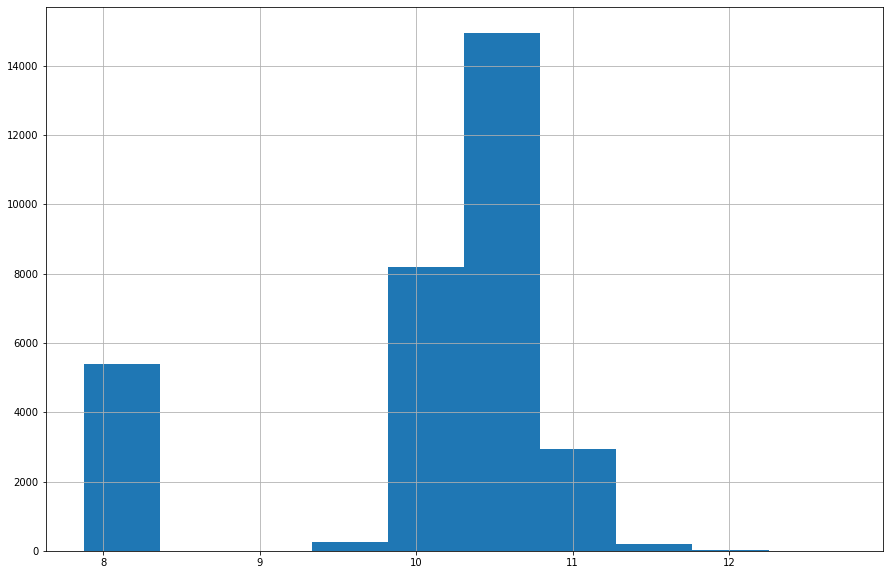

In [54]:
test['Annual_Premium_log'].hist(figsize=(15,10))

In [52]:
train['Annual_Premium_log']=np.log1p(train['Annual_Premium'].values)

In [53]:
test['Annual_Premium_log']=np.log1p(test['Annual_Premium'].values)

In [55]:
train['Vintage'].value_counts()

256    1418
73     1410
282    1397
158    1394
187    1392
160    1388
226    1388
31     1388
131    1387
245    1387
232    1386
126    1386
298    1384
191    1383
103    1383
27     1382
215    1382
65     1379
24     1379
54     1378
130    1376
63     1375
197    1375
37     1373
42     1372
249    1370
74     1368
284    1367
117    1366
34     1366
76     1365
228    1364
80     1364
263    1364
292    1363
92     1362
110    1362
165    1361
248    1361
195    1360
83     1359
241    1358
77     1358
56     1357
113    1357
250    1357
219    1356
144    1356
200    1355
84     1354
90     1352
102    1352
222    1351
94     1351
147    1350
193    1349
173    1348
257    1348
270    1348
194    1347
189    1346
151    1346
288    1345
11     1344
30     1343
251    1343
254    1343
115    1343
40     1343
227    1342
230    1342
95     1342
71     1342
105    1341
49     1340
106    1340
186    1340
33     1339
242    1339
216    1339
135    1339
272    1338
268    1338
253 

In [ ]:
train.nunique()

In [56]:
test['Policy_Sales_Channel']=test['Policy_Sales_Channel'].fillna(test['Policy_Sales_Channel'].median())
test['Vintage']=test['Vintage'].fillna(test['Vintage'].mode()[0])

In [71]:
test.isnull().sum()

id                          0
Gender                      0
Age                         0
Driving_License             0
Region_Code                 0
Previously_Insured          0
Vehicle_Age                 0
Vehicle_Damage              0
Annual_Premium              0
Policy_Sales_Channel        0
Vintage                     0
Annual_Premium_log          0
Vehicle_Age_premium         0
Age_premium                 0
Vehicle_Age_damage_count    0
dtype: int64

In [70]:
train.isnull().sum()

id                          0
Gender                      0
Age                         0
Driving_License             0
Region_Code                 0
Previously_Insured          0
Vehicle_Age                 0
Vehicle_Damage              0
Annual_Premium              0
Policy_Sales_Channel        0
Vintage                     0
Response                    0
Annual_Premium_log          0
Vehicle_Age_premium         0
Age_premium                 0
Vehicle_Age_damage_count    0
dtype: int64

In [58]:
train['Vehicle_Age_premium']=train.groupby(['Vehicle_Age'])['Annual_Premium'].transform('mean')
pc1_mean_dict = train.groupby(['Vehicle_Age'])['Annual_Premium'].mean().to_dict()
test['Vehicle_Age_premium'] = test['Vehicle_Age'].apply(lambda x:pc1_mean_dict.get(x,0))

In [62]:
train['Age_premium']=train.groupby(['Age'])['Annual_Premium'].transform('mean')
pc2_mean_dict = train.groupby(['Age'])['Annual_Premium'].mean().to_dict()
test['Age_premium'] = test['Age'].apply(lambda x:pc2_mean_dict.get(x,0))

In [80]:
train.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1       1   44                1         28.0                   0   
1   2       1   76                1          3.0                   0   
2   3       1   47                1         28.0                   0   
3   4       1   21                1         11.0                   1   
4   5       0   29                1         41.0                   1   

   Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0            0               1         40454.0                  26.0      217   
1            1               0         33536.0                  26.0      183   
2            0               1         38294.0                  26.0       27   
3            2               0         28619.0                 152.0      203   
4            2               0         27496.0                 152.0       39   

   Response  Annual_Premium_log  Vehicle_Age_premium   Age_premium  \
0         1           10.607946         35654.499469  31227.811894   
1         0           10.420405         30523.582120  34640.320201   
2         1           10.553075         35654.499469  31410.618827   
3         0           10.261861         30119.552025  30591.404448   
4         0           10.221832         30119.552025  27865.179297   

   Vehicle_Age_damage_count  
0                     16007  
1                    200316  
2                     16007  
3                    164786  
4                    164786

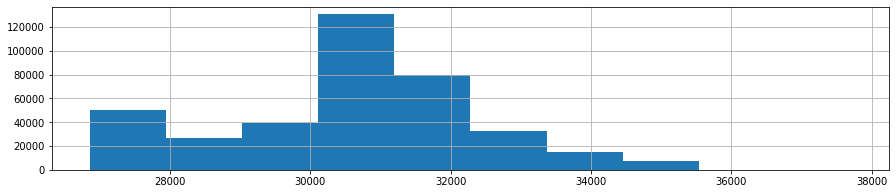

In [68]:
train['Age_premium'].hist(figsize=(15,3))

In [69]:
train['Vehicle_Age_damage_count']=train.groupby('Vehicle_Age')['Vehicle_Damage'].transform('count')
pc3_mean_dict = train.groupby(['Vehicle_Age'])['Vehicle_Damage'].count().to_dict()
test['Vehicle_Age_damage_count']=test['Vehicle_Age'].apply(lambda x:pc3_mean_dict.get(x,0))

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        381109 non-null  int64  
 1   Gender                    381109 non-null  object 
 2   Age                       381109 non-null  int64  
 3   Driving_License           381109 non-null  int64  
 4   Region_Code               381109 non-null  float64
 5   Previously_Insured        381109 non-null  int64  
 6   Vehicle_Age               381109 non-null  object 
 7   Vehicle_Damage            381109 non-null  object 
 8   Annual_Premium            381109 non-null  float64
 9   Policy_Sales_Channel      381109 non-null  float64
 10  Vintage                   381109 non-null  int64  
 11  Response                  381109 non-null  int64  
 12  Annual_Premium_log        381109 non-null  float64
 13  Vehicle_Age_premium       381109 non-null  f

In [ ]:
cat_obj_feautres=['Gender','Vehicle_Age','Vehicle_Damage']

In [74]:
train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [75]:
map1={'Male':1,'Female':0}
train['Gender']=train['Gender'].map(map1)

In [76]:
train['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [77]:
map2={'> 2 Years':0,'1-2 Year':1,'< 1 Year':2}
train['Vehicle_Age']=train['Vehicle_Age'].map(map2)

In [78]:
train['Vehicle_Damage'].unique()

array(['Yes', 'No'], dtype=object)

In [79]:
map3={'Yes':1,'No':0}
train['Vehicle_Damage']=train['Vehicle_Damage'].map(map3)

In [81]:
test['Gender']=test['Gender'].map(map1)
test['Vehicle_Age']=test['Vehicle_Age'].map(map2)
test['Vehicle_Damage']=test['Vehicle_Damage'].map(map3)

In [82]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Annual_Premium_log',
       'Vehicle_Age_premium', 'Age_premium', 'Vehicle_Age_damage_count'],
      dtype='object')

In [83]:
predictors=['Gender', 'Age', 'Driving_License', 'Region_Code','Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
'Policy_Sales_Channel', 'Vintage','Annual_Premium_log','Vehicle_Age_premium', 'Age_premium', 'Vehicle_Age_damage_count']

Target=['Response']

X=train[predictors].values
y=train[Target].values

In [85]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,power_transform
std=MinMaxScaler()
X=std.fit_transform(X)

In [89]:
X[:,: -1]

array([[1.        , 0.36923077, 1.        , ..., 0.51325379, 1.        ,
        0.40264668],
       [1.        , 0.86153846, 1.        , ..., 0.47803161, 0.07299619,
        0.71734401],
       [1.        , 0.41538462, 1.        , ..., 0.50294846, 1.        ,
        0.41950491],
       ...,
       [1.        , 0.01538462, 1.        , ..., 0.48668837, 0.        ,
        0.34395797],
       [0.        , 0.73846154, 1.        , ..., 0.5316493 , 1.        ,
        0.58262647],
       [1.        , 0.4       , 1.        , ..., 0.51929747, 0.07299619,
        0.4014914 ]])

In [90]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

**************************************************
The Classification report               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66880
           1       0.58      0.00      0.01      9342

    accuracy                           0.88     76222
   macro avg       0.73      0.50      0.47     76222
weighted avg       0.84      0.88      0.82     76222

The Confusion report [[66856    24]
 [ 9309    33]]
The Accuracy 0.5015867912468156
**************************************************
The Classification report               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66880
           1       0.47      0.00      0.01      9342

    accuracy                           0.88     76222
   macro avg       0.68      0.50      0.47     76222
weighted avg       0.83      0.88      0.82     76222

The Confusion report [[66829    51]
 [ 9296    46]]
The Accuracy 0.5020807196675199
************************

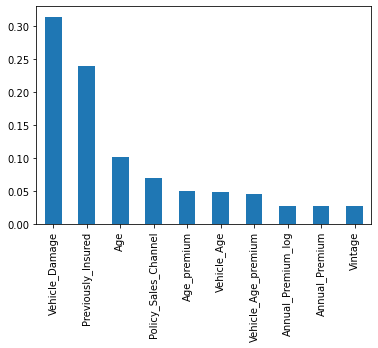

In [95]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5, random_state=56, shuffle=True)
for train_index, test_index in skf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf1 = RandomForestClassifier(n_estimators=1200, criterion='gini', max_depth=12)
    model=clf1.fit(X_train,y_train)
    predictions=model.predict(X_test)
    print('*'*50)
    print("The Classification report",metrics.classification_report(y_test,predictions))
    print("The Confusion report",metrics.confusion_matrix(y_test,predictions))
    print("The Accuracy",metrics.roc_auc_score(y_test,predictions))
feautreimportance=pd.Series(model.feature_importances_, index=predictors)
feautreimportance.nlargest(10).plot(kind='bar')

In [96]:
Test_X=test[predictors].values
pred_test=clf1.predict(Test_X)

In [97]:
sub_df=pd.DataFrame(test, columns=['id'])
sub_df['Response']=pred_test

In [98]:
sub_df.to_csv('sub_df.csv', index=False)